In [1]:
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
import eli5
from datetime import datetime

#fast ai libraries
from fastai.imports import *
#from structured import *

# Modeling lib
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
import lightgbm as lgb

/Users/prabha/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/prabha/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
import sklearn
sklearn.__version__

'0.22.1'

In [3]:
# Loading the data
train,test = pd.read_csv('dataset/train.csv'),pd.read_csv('dataset/test.csv')
train.index = train['id']
test.index = test['id']

In [4]:
train.loc[train['id'] == 16,'revenue'] = 192864         
train.loc[train['id'] == 90,'budget'] = 30000000                  
train.loc[train['id'] == 118,'budget'] = 60000000       
train.loc[train['id'] == 149,'budget'] = 18000000       
train.loc[train['id'] == 313,'revenue'] = 12000000       
train.loc[train['id'] == 451,'revenue'] = 12000000      
train.loc[train['id'] == 464,'budget'] = 20000000       
train.loc[train['id'] == 470,'budget'] = 13000000       
train.loc[train['id'] == 513,'budget'] = 930000         
train.loc[train['id'] == 797,'budget'] = 8000000        
train.loc[train['id'] == 819,'budget'] = 90000000       
train.loc[train['id'] == 850,'budget'] = 90000000       
train.loc[train['id'] == 1007,'budget'] = 2              
train.loc[train['id'] == 1112,'budget'] = 7500000       
train.loc[train['id'] == 1131,'budget'] = 4300000        
train.loc[train['id'] == 1359,'budget'] = 10000000       
train.loc[train['id'] == 1542,'budget'] = 1             
train.loc[train['id'] == 1570,'budget'] = 15800000       
train.loc[train['id'] == 1571,'budget'] = 4000000        
train.loc[train['id'] == 1714,'budget'] = 46000000       
train.loc[train['id'] == 1721,'budget'] = 17500000       
train.loc[train['id'] == 1865,'revenue'] = 25000000      
train.loc[train['id'] == 1885,'budget'] = 12             
train.loc[train['id'] == 2091,'budget'] = 10             
train.loc[train['id'] == 2268,'budget'] = 17500000       
train.loc[train['id'] == 2491,'budget'] = 6              
train.loc[train['id'] == 2602,'budget'] = 31000000       
train.loc[train['id'] == 2612,'budget'] = 15000000       
train.loc[train['id'] == 2696,'budget'] = 10000000      
train.loc[train['id'] == 2801,'budget'] = 10000000       
train.loc[train['id'] == 335,'budget'] = 2 
train.loc[train['id'] == 348,'budget'] = 12
train.loc[train['id'] == 470,'budget'] = 13000000 
train.loc[train['id'] == 513,'budget'] = 1100000
train.loc[train['id'] == 640,'budget'] = 6 
train.loc[train['id'] == 696,'budget'] = 1
train.loc[train['id'] == 797,'budget'] = 8000000 
train.loc[train['id'] == 850,'budget'] = 1500000
train.loc[train['id'] == 1199,'budget'] = 5 
train.loc[train['id'] == 1282,'budget'] = 9              
train.loc[train['id'] == 1347,'budget'] = 1
train.loc[train['id'] == 1755,'budget'] = 2
train.loc[train['id'] == 1801,'budget'] = 5
train.loc[train['id'] == 1918,'budget'] = 592 
train.loc[train['id'] == 2033,'budget'] = 4
train.loc[train['id'] == 2118,'budget'] = 344 
train.loc[train['id'] == 2252,'budget'] = 130
train.loc[train['id'] == 2256,'budget'] = 1 
train.loc[train['id'] == 2696,'budget'] = 10000000

In [5]:
test.loc[test['id'] == 3033,'budget'] = 250 
test.loc[test['id'] == 3051,'budget'] = 50
test.loc[test['id'] == 3084,'budget'] = 337
test.loc[test['id'] == 3224,'budget'] = 4  
test.loc[test['id'] == 3594,'budget'] = 25  
test.loc[test['id'] == 3619,'budget'] = 500  
test.loc[test['id'] == 3831,'budget'] = 3  
test.loc[test['id'] == 3935,'budget'] = 500  
test.loc[test['id'] == 4049,'budget'] = 995946 
test.loc[test['id'] == 4424,'budget'] = 3  
test.loc[test['id'] == 4460,'budget'] = 8  
test.loc[test['id'] == 4555,'budget'] = 1200000 
test.loc[test['id'] == 4624,'budget'] = 30 
test.loc[test['id'] == 4645,'budget'] = 500 
test.loc[test['id'] == 4709,'budget'] = 450 
test.loc[test['id'] == 4839,'budget'] = 7
test.loc[test['id'] == 3125,'budget'] = 25 
test.loc[test['id'] == 3142,'budget'] = 1
test.loc[test['id'] == 3201,'budget'] = 450
test.loc[test['id'] == 3222,'budget'] = 6
test.loc[test['id'] == 3545,'budget'] = 38
test.loc[test['id'] == 3670,'budget'] = 18
test.loc[test['id'] == 3792,'budget'] = 19
test.loc[test['id'] == 3881,'budget'] = 7
test.loc[test['id'] == 3969,'budget'] = 400
test.loc[test['id'] == 4196,'budget'] = 6
test.loc[test['id'] == 4221,'budget'] = 11
test.loc[test['id'] == 4222,'budget'] = 500
test.loc[test['id'] == 4285,'budget'] = 11
test.loc[test['id'] == 4319,'budget'] = 1
test.loc[test['id'] == 4639,'budget'] = 10
test.loc[test['id'] == 4719,'budget'] = 45
test.loc[test['id'] == 4822,'budget'] = 22
test.loc[test['id'] == 4829,'budget'] = 20
test.loc[test['id'] == 4969,'budget'] = 20
test.loc[test['id'] == 5021,'budget'] = 40 
test.loc[test['id'] == 5035,'budget'] = 1 
test.loc[test['id'] == 5063,'budget'] = 14 
test.loc[test['id'] == 5119,'budget'] = 2 
test.loc[test['id'] == 5214,'budget'] = 30 
test.loc[test['id'] == 5221,'budget'] = 50 
test.loc[test['id'] == 4903,'budget'] = 15
test.loc[test['id'] == 4983,'budget'] = 3
test.loc[test['id'] == 5102,'budget'] = 28
test.loc[test['id'] == 5217,'budget'] = 75
test.loc[test['id'] == 5224,'budget'] = 3 
test.loc[test['id'] == 5469,'budget'] = 20 
test.loc[test['id'] == 5840,'budget'] = 1 
test.loc[test['id'] == 5960,'budget'] = 30
test.loc[test['id'] == 6506,'budget'] = 11 
test.loc[test['id'] == 6553,'budget'] = 280
test.loc[test['id'] == 6561,'budget'] = 7
test.loc[test['id'] == 6582,'budget'] = 218
test.loc[test['id'] == 6638,'budget'] = 5
test.loc[test['id'] == 6749,'budget'] = 8 
test.loc[test['id'] == 6759,'budget'] = 50 
test.loc[test['id'] == 6856,'budget'] = 10
test.loc[test['id'] == 6858,'budget'] =  100
test.loc[test['id'] == 6876,'budget'] =  250
test.loc[test['id'] == 6972,'budget'] = 1
test.loc[test['id'] == 7079,'budget'] = 8000000
test.loc[test['id'] == 7150,'budget'] = 118
test.loc[test['id'] == 6506,'budget'] = 118
test.loc[test['id'] == 7225,'budget'] = 6
test.loc[test['id'] == 7231,'budget'] = 85
test.loc[test['id'] == 5222,'budget'] = 5
test.loc[test['id'] == 5322,'budget'] = 90
test.loc[test['id'] == 5350,'budget'] = 70
test.loc[test['id'] == 5378,'budget'] = 10
test.loc[test['id'] == 5545,'budget'] = 80
test.loc[test['id'] == 5810,'budget'] = 8
test.loc[test['id'] == 5926,'budget'] = 300
test.loc[test['id'] == 5927,'budget'] = 4
test.loc[test['id'] == 5986,'budget'] = 1
test.loc[test['id'] == 6053,'budget'] = 20
test.loc[test['id'] == 6104,'budget'] = 1
test.loc[test['id'] == 6130,'budget'] = 30
test.loc[test['id'] == 6301,'budget'] = 150
test.loc[test['id'] == 6276,'budget'] = 100
test.loc[test['id'] == 6473,'budget'] = 100
test.loc[test['id'] == 6842,'budget'] = 30

In [6]:
# Filling the missing data
test.loc[test['release_date'].isnull(),'release_date'] = '05/01/00'

In [7]:
dict_column = ['belongs_to_collection','genres','spoken_languages','Keywords','cast','crew','production_companies']

In [8]:
def text_to_dict(df,columns):
    for col in columns:
        df[col] = df[col].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x))
    return df

In [9]:
train = text_to_dict(train,dict_column)
test = text_to_dict(test,dict_column)

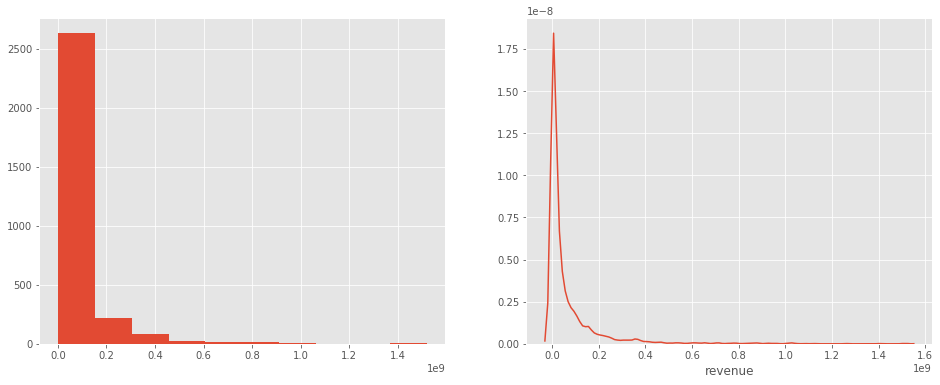

In [10]:
fig, ax = plt.subplots(figsize = (16,6))

plt.subplot(1,2,1)
plt.hist(train['revenue'])

plt.subplot(1,2,2)
sns.distplot(train['revenue'],hist=False)
plt.show()

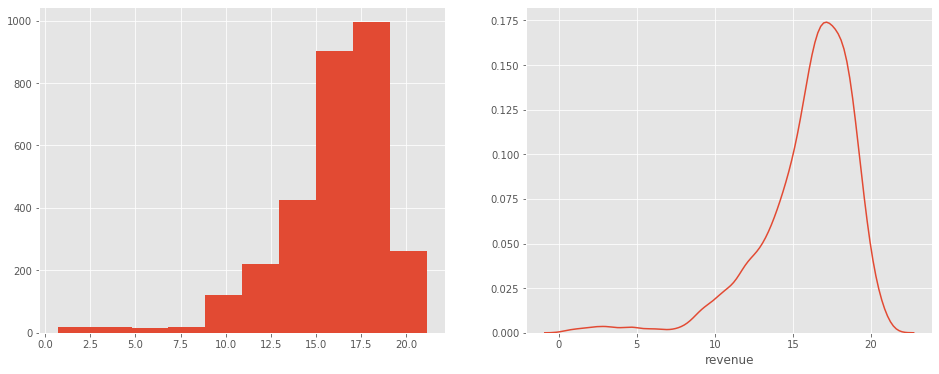

In [11]:
# Revenue is right skewed. Need to take log
fig, ax = plt.subplots(figsize = (16,6))
plt.subplot(1,2,1)
plt.hist(np.log1p(train['revenue']))

plt.subplot(1,2,2)
sns.distplot(np.log1p(train['revenue']),hist=False)
plt.show()


In [12]:
train['log_revenue'] = np.log1p(train['revenue'])
train = train.drop(['revenue'],axis = 1)

In [13]:
train.shape,test.shape

((3000, 23), (4398, 22))

In [14]:
# Checking the columns b/w train & test datasets
train_columns,test_columns = set(list(train.columns)),set(list(test.columns))

train_columns.difference(test_columns),test_columns.difference(train_columns)

({'log_revenue'}, set())

In [15]:
# Combining the dataset for pre-processing

train_rows = train.shape[0]

combined= train.append(test,ignore_index = True)

In [16]:
combined.head(3)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,log_revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",16.326300
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",18.370959
2,3,{},3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",16.387512


In [17]:
combined.loc[combined['tagline'].isnull(),'tagline'] = 'NaN'
combined['has_tagline'] = combined['tagline'].apply(lambda x : 1 if x != 'NaN' else 0)

In [18]:
selected_columns = ['budget',
                    'original_language',
                    'popularity',
                    'belongs_to_collection',
                    'release_date',
                    'has_tagline',
                    'genres',
                    'cast',
                    'production_companies',
                    'log_revenue']

In [19]:
combined = combined[selected_columns]

<BarContainer object of 7398 artists>

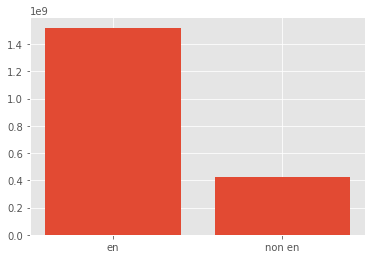

In [20]:
plt.bar(combined['original_language'].apply(lambda x: x if x == 'en' else 'non en'),np.exp(combined['log_revenue']))

In [21]:
# Extract Leading actor
combined['leading_actor'] = combined.loc[:,'cast'].apply(lambda x : x[0]['name'] if len(x)!=0 else '')
combined= combined.drop(['cast'],axis = 1)

In [22]:
# Extracting production_companies
combined['leading_production'] = combined.loc[:,'production_companies'].apply(lambda x : x[0]['name'] if len(x)!=0  else '')
combined= combined.drop(['production_companies'],axis = 1)

In [23]:
# Extract Main genere
combined['main_genre'] = combined.loc[:,'genres'].apply(lambda x : x[0]['name'] if len(x)!=0 else '')
combined= combined.drop(['genres'],axis = 1)

In [24]:
# Convert the relase date as date column & extract year

combined['year'] = combined['release_date'].apply(lambda x: datetime.strptime(x,'%m/%d/%y').year)
combined['month'] = combined['release_date'].apply(lambda x: datetime.strptime(x,'%m/%d/%y').month)
combined['year'] = combined['year'].apply(lambda x : x - 100 if x > 2020 else x)

combined= combined.drop(['release_date'],axis = 1)

In [25]:
import seaborn as sns
#sns.boxplot(combined['month'],combined['log_revenue'])

In [26]:
combined['is_collection'] = combined['belongs_to_collection'].apply(lambda x : 1 if x != {} else 0)

In [27]:
(combined['belongs_to_collection'].apply(lambda x : len(x) if x!={} else 0)).value_counts()

0    5917
1    1481
Name: belongs_to_collection, dtype: int64

In [28]:
# Since we at most each move is part of one collection, lets add the collection name
vc = pd.DataFrame(combined['belongs_to_collection'].apply(lambda x : x[0]['name'] if x !={} else 'NA').value_counts())

movie_collection_list = list(vc.query('belongs_to_collection>1 and belongs_to_collection < 1000').index)

In [29]:
combined['collection_name'] = combined['belongs_to_collection'].apply( 
                                lambda x: x[0]['name'] if (x!={} and x[0]['name'] in movie_collection_list) else 'NA')

In [30]:
combined = combined.drop(['belongs_to_collection'],axis = 1)

In [31]:
# oneHot encoding - Original_language

combined['original_language'] = combined['original_language'].apply(lambda x: x if x == 'en' else 'non_en')

en_original_language_fit = OneHotEncoder(handle_unknown='ignore').fit(combined[['original_language']])
en_original_language = pd.DataFrame(en_original_language_fit.transform(combined[['original_language']]).toarray())
combined= combined.join(en_original_language,rsuffix='_original_language')

combined = combined.drop(['original_language'],axis = 1)

In [32]:
list(combined['collection_name'].value_counts().index)[1:20]

['James Bond Collection',
 'Friday the 13th Collection',
 'Pokémon Collection',
 'The Pink Panther (Original) Collection',
 'Harry Potter Collection',
 'Star Wars Collection',
 'Halloween Collection',
 'The Fast and the Furious Collection',
 'A Nightmare on Elm Street Collection',
 'Police Academy Collection',
 'Saw Collection',
 'Rocky Collection',
 'X-Men Collection',
 'Star Trek: The Original Series Collection',
 'Paranormal Activity Collection',
 'Resident Evil Collection',
 'The Muppet Collection',
 'The Jack Ryan Collection',
 'Mission: Impossible Collection']

In [33]:
# oneHot encoding - Original_language

popular_collection = list(combined['collection_name'].value_counts()[1:20].index)

combined['collection_name'] = combined['collection_name'].apply(lambda x : x if x in popular_collection else 'other')

en_collection_name = pd.DataFrame(OneHotEncoder(handle_unknown='ignore').fit_transform(combined[['collection_name']]).toarray())
combined= combined.join(en_collection_name,rsuffix='_collection_name')

combined = combined.drop(['collection_name'],axis = 1)

In [34]:
# oneHot encoding - Month
en_month = pd.DataFrame(OneHotEncoder(handle_unknown='ignore').fit_transform(combined[['month']]).toarray())
combined= combined.join(en_month,rsuffix='_month')

combined = combined.drop(['month'],axis = 1)

In [35]:
# oneHot encoding - Leading Actor
popular_leading_actor = list(combined['leading_actor'].value_counts()[1:30].index)

combined['leading_actor'] = combined['leading_actor'].apply(lambda x : x if x in popular_leading_actor else 'other')

en_leading_actor = pd.DataFrame(OneHotEncoder(handle_unknown='ignore').fit_transform(combined[['leading_actor']]).toarray())
combined= combined.join(en_leading_actor,rsuffix='_leading_actor')

combined = combined.drop(['leading_actor'],axis = 1)

In [36]:
# oneHot encoding - main genres

popular_genre  = list(combined['main_genre'].value_counts()[0:15].index)

combined['main_genre'] = combined['main_genre'].apply(lambda x : x if x in popular_genre else 'other')

en_genre = pd.DataFrame(OneHotEncoder(handle_unknown='ignore').fit_transform(combined[['main_genre']]).toarray())
combined= combined.join(en_genre,rsuffix='_main_genre')

combined = combined.drop(['main_genre'],axis = 1)

In [37]:
# oneHot encoding - leading production
popular_production = list(combined['leading_production'].value_counts()[1:11].index)

combined['leading_production'] = combined['leading_production'].apply(lambda x : 'big_producer' if x in popular_production else 'small_producer')

en_production = pd.DataFrame(OneHotEncoder(handle_unknown='ignore').fit_transform(combined[['leading_production']]).toarray())
combined= combined.join(en_production,rsuffix='_leading_production')

combined = combined.drop(['leading_production'],axis = 1)

In [38]:
# Modeling

In [39]:
train1 = combined.loc[:train_rows-1,]
test1 = combined.loc[train_rows:,]

In [40]:
train_trainX,train_validX,train_trainY,train_validY = train_test_split(train1,train1['log_revenue'],test_size = 0.2)

In [41]:
train_trainX = train_trainX.drop(['log_revenue'],axis=1)
train_validX = train_validX.drop(['log_revenue'],axis=1)
test1 = test1.drop(['log_revenue'],axis=1)

In [42]:
train_trainX.shape,train_validX.shape,test1.shape

((2400, 87), (600, 87), (4398, 87))

In [44]:


regr = lgb.LGBMRegressor(n_estimators=10000,
                        objective='regression',
                        metric='rmse',
                        max_depth=5,
                        num_leaves=5,
                        min_child_samples=100,
                        learning_rate=0.001,
                        boosting = 'gbdt',
                        min_data_in_leaf=10,
                        feature_fraction=0.3,
                        bagging_freq=1,
                        bagging_fraction=0.9,
                        importance_type='gain',
                        lambda_l1=0.2,
                        bagging_seed=12,
                        subsample=0.8,
                        colsample_bytree=0.9,
                        use_best_model = True)


model = regr.fit(train_trainX,train_trainY)

In [48]:
train_trainX.shape

(2400, 87)

In [46]:
train1_train_prediction = pd.DataFrame({'Predicted': model.predict(train_trainX),'Actual': train_trainY})

# Train Error 
np.sqrt(metrics.mean_squared_error(train1_train_prediction['Predicted'],train1_train_prediction['Actual']))

1.8108109766897913

In [94]:
train1_train_prediction = pd.DataFrame({'Predicted': model.predict(train_validX),'Actual': train_validY})

# Valid Error 
np.sqrt(metrics.mean_squared_error(train1_train_prediction['Predicted'],train1_train_prediction['Actual']))

2.0707853969884487

In [369]:
# Lets Submit to Kaggle
train1_test_prediction = pd.DataFrame({'id':test['id'],
                                       'revenue': np.exp(model.predict(test1))}
                                     )

train1_test_prediction.to_csv('submission.csv',index=False)           